In [3]:
import pandas as pd
import chart_studio.plotly as py
import plotly.express as px
%matplotlib inline

In [5]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 
#cf.go_offline()


## Use Kaleido for image export

In [6]:
import kaleido


Use Image for image import

In [7]:
from IPython.display import Image

## Read Data

In [8]:
data = pd.read_excel('Data_Skiresorts_Final.xlsx')
df = data.copy()
df.head()

,ID,Skiresort_ID,Skigebiet_Name,Kanton,Ort,Land,PLZ,Min_Höhe,Max_Höhe,Total_Pisten_Km,blaue_Piste_km,rote_Piste_km,schwarze_Piste_km,Anzahl_Bahnen,Preis in CHF,Kanton_Kuerzel,SPRACHCODE,Geo Shape,Breitengrad,Längengrad
0,1,2.0,Adelboden,Bern,Adelboden,Schweiz,3715,1260,2200,86.0,46.0,34.0,6.0,25,70.0,BE,1,"{""coordinates"":[[[7.556297221810153,46.4136636...",46.473621,7.555155
1,49,83.0,Engstligenalp - Adelboden,Bern,Adelboden,Schweiz,3715,1971,2353,17.0,7.0,6.0,4.0,8,55.0,BE,1,"{""coordinates"":[[[7.556297221810153,46.4136636...",46.473621,7.555155
2,3,203.0,Aeschi,Bern,Aeschi bei Spiez,Schweiz,3703,860,890,0.2,0.2,0.0,0.0,1,15.0,BE,1,"{""coordinates"":[[[7.702246806277913,46.6379152...",46.654293,7.698838
3,4,8.0,Airolo - Pesciüm,Tessin,Airolo,Schweiz,6780,1175,2250,30.0,1.0,15.0,14.0,8,0.0,TI,3,"{""coordinates"":[[[8.62939138876246,46.52450327...",46.527249,8.630648
4,7,17.0,Amden,St. Gallen,Amden,Schweiz,8873,931,1684,20.0,10.0,10.0,0.0,6,38.0,SG,1,"{""coordinates"":[[[9.189869575108307,47.1236998...",47.159937,9.167880


## Create Dataframe for chart

In [9]:
df_Kanton_Kilometer = df.groupby('Kanton')['Total_Pisten_Km'].sum().sort_values(ascending=False).reset_index()
df_Kanton_Kilometer.head(5)

,Kanton,Total_Pisten_Km
0,Wallis,4676.6
1,Graubuenden,1905.8
2,Bern,645.6
3,Waadt,247.6
4,St. Gallen,222.5


## Bar Chart
- Create the bar chart
- Save bar chart to png file
- Display bar chart

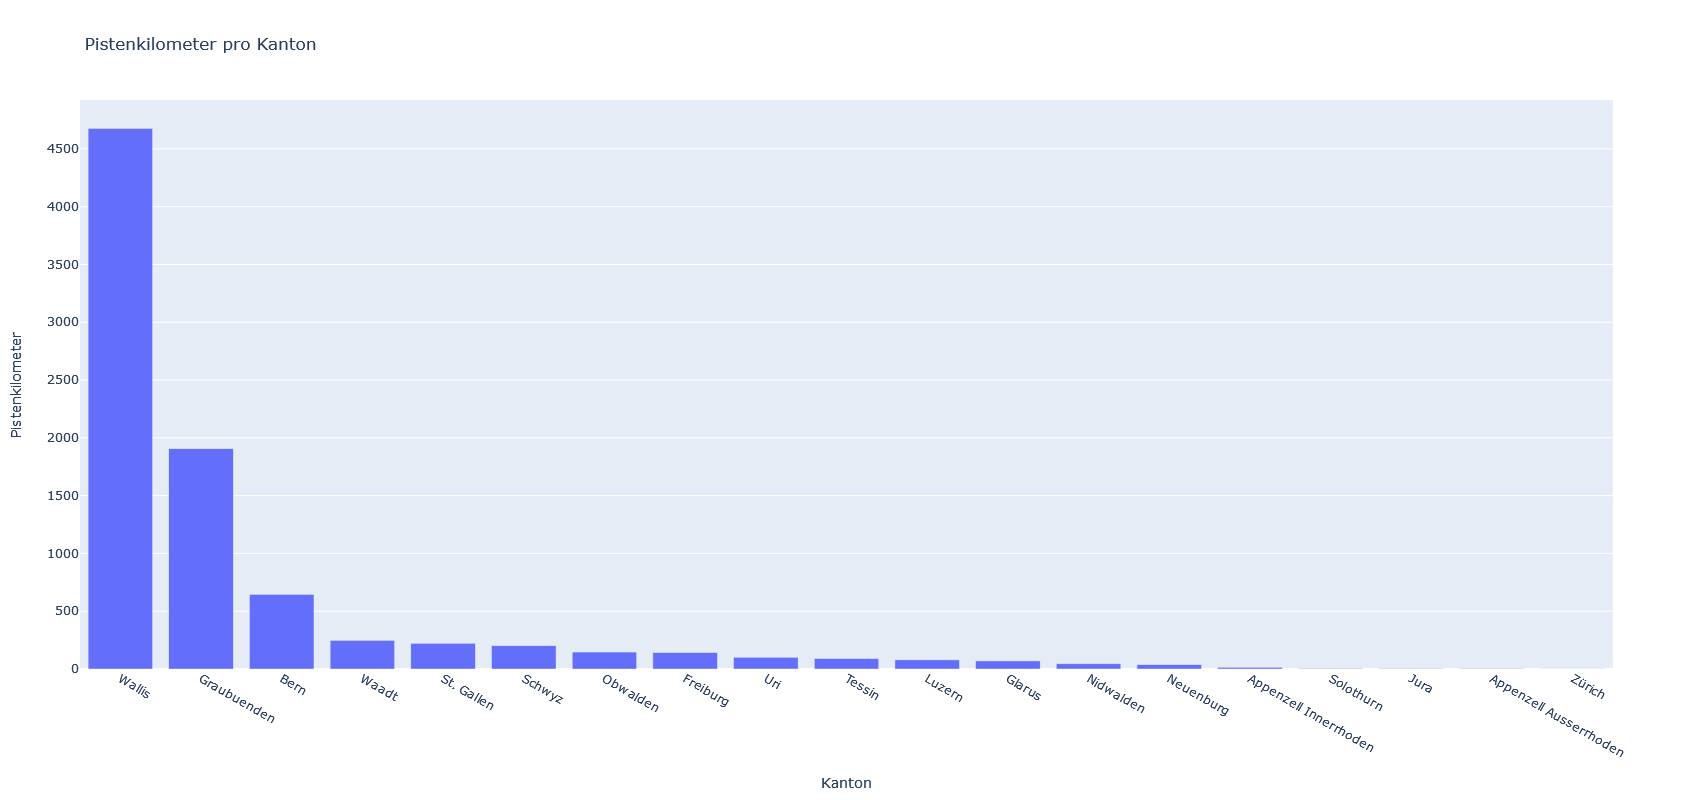

In [10]:
fig = px.bar(df_Kanton_Kilometer, x='Kanton', y='Total_Pisten_Km', title="Pistenkilometer pro Kanton", labels={'Kanton':'Kanton', 'Total_Pisten_Km': 'Pistenkilometer'},height=800)
fig.write_image("fig_bar_chart.png")
fig

In [12]:
fig.write_html('Graph_Pistenkilometer.html')

Imported File to show it on github

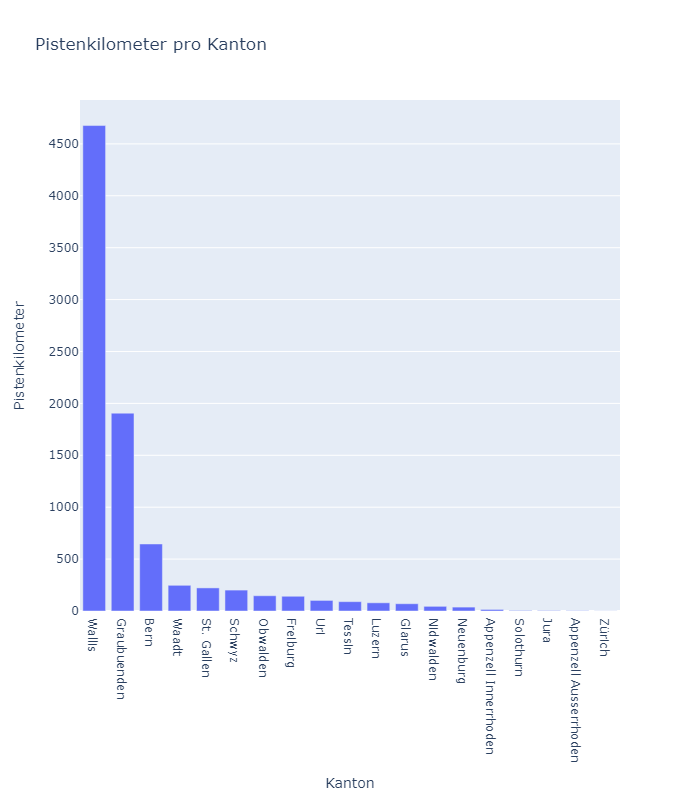

In [11]:
Image(filename='fig_bar_chart.png') 

## First try with scatter_geo
- Created the scatter_geo plot with lat and lon and set a hover_name.
- Updated with title, geo_scope, width and height
- Upated update_geos to focus on Switzerland

Result ist not satisfying.

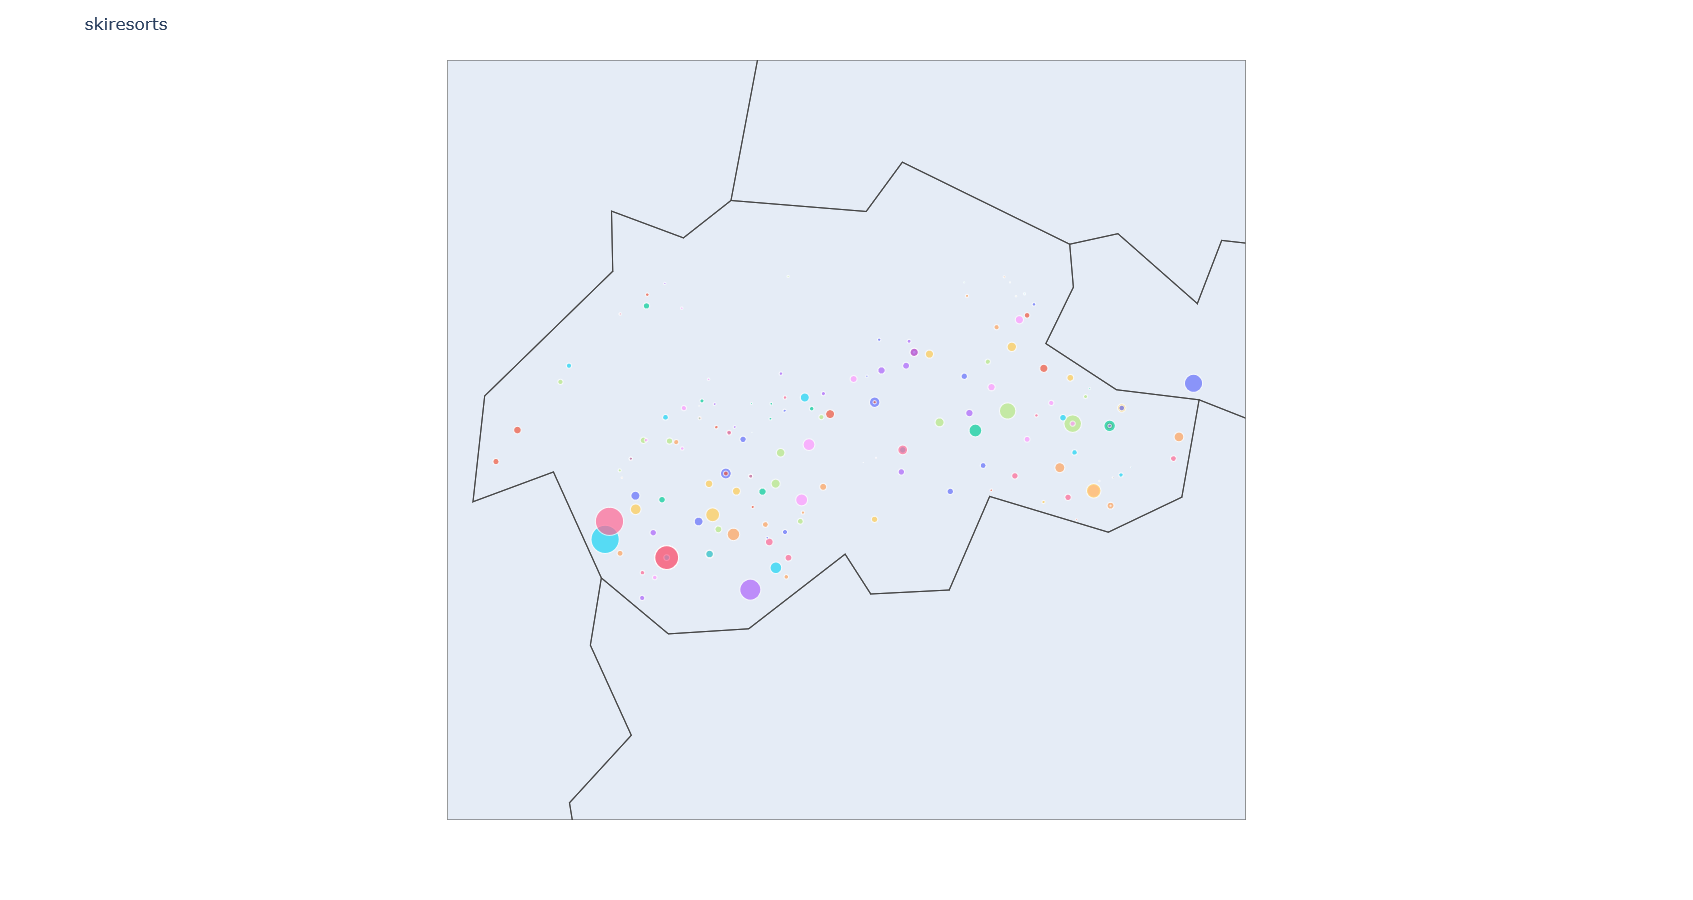

In [16]:
fig = px.scatter_geo(df,
                    lat=df.Breitengrad,
                    lon=df.Längengrad,
                     color = df.Skigebiet_Name,
                     size = df.Total_Pisten_Km,
                    hover_name="Skigebiet_Name")
fig.update_layout(
        title = 'skiresorts',
        geo_scope='europe',
    width = 1800,
    height = 900,
                 showlegend = False)
fig.update_geos(fitbounds="locations")

fig.write_image("fig_scatter_geo.png")
fig.show()


In [17]:
fig.write_html('Map_Switerland_lame.html')

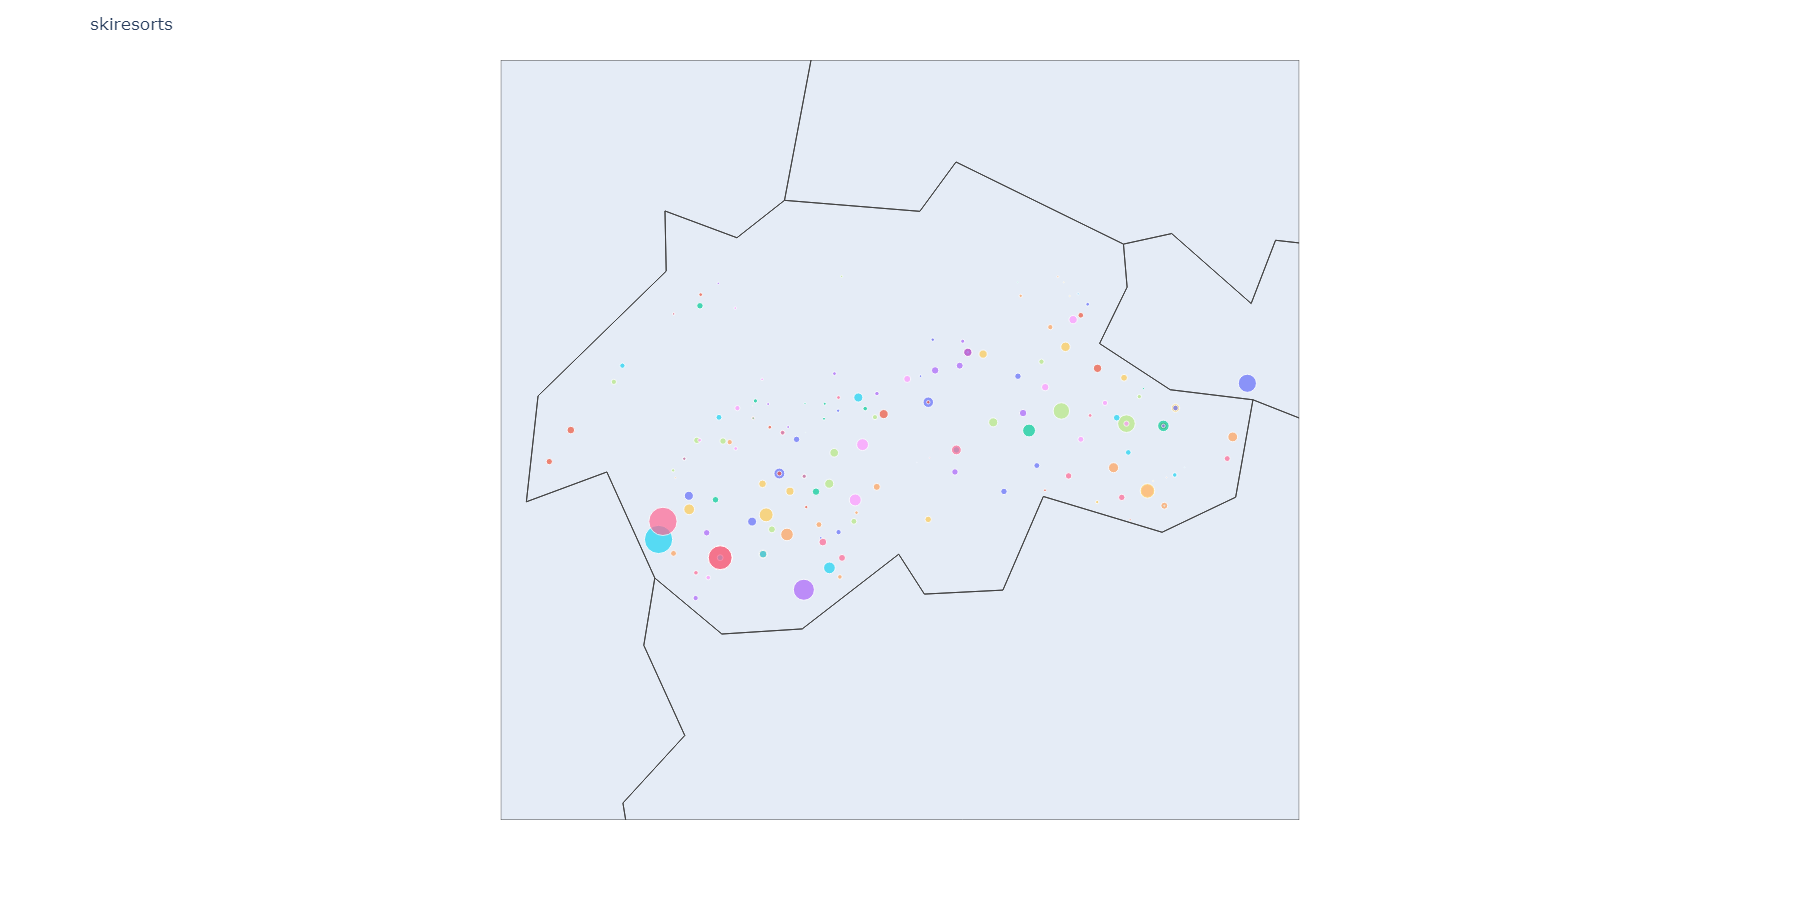

In [34]:
Image(filename='fig_scatter_geo.png') 

## Second try with scatter_mapbox
- Created the scatter_geo plot with lat and lon and set a hover_name and added zoom
- Updated with mapbox_style, title, geo_scope, width and height
- Upated update_geos to focus on Switzerland

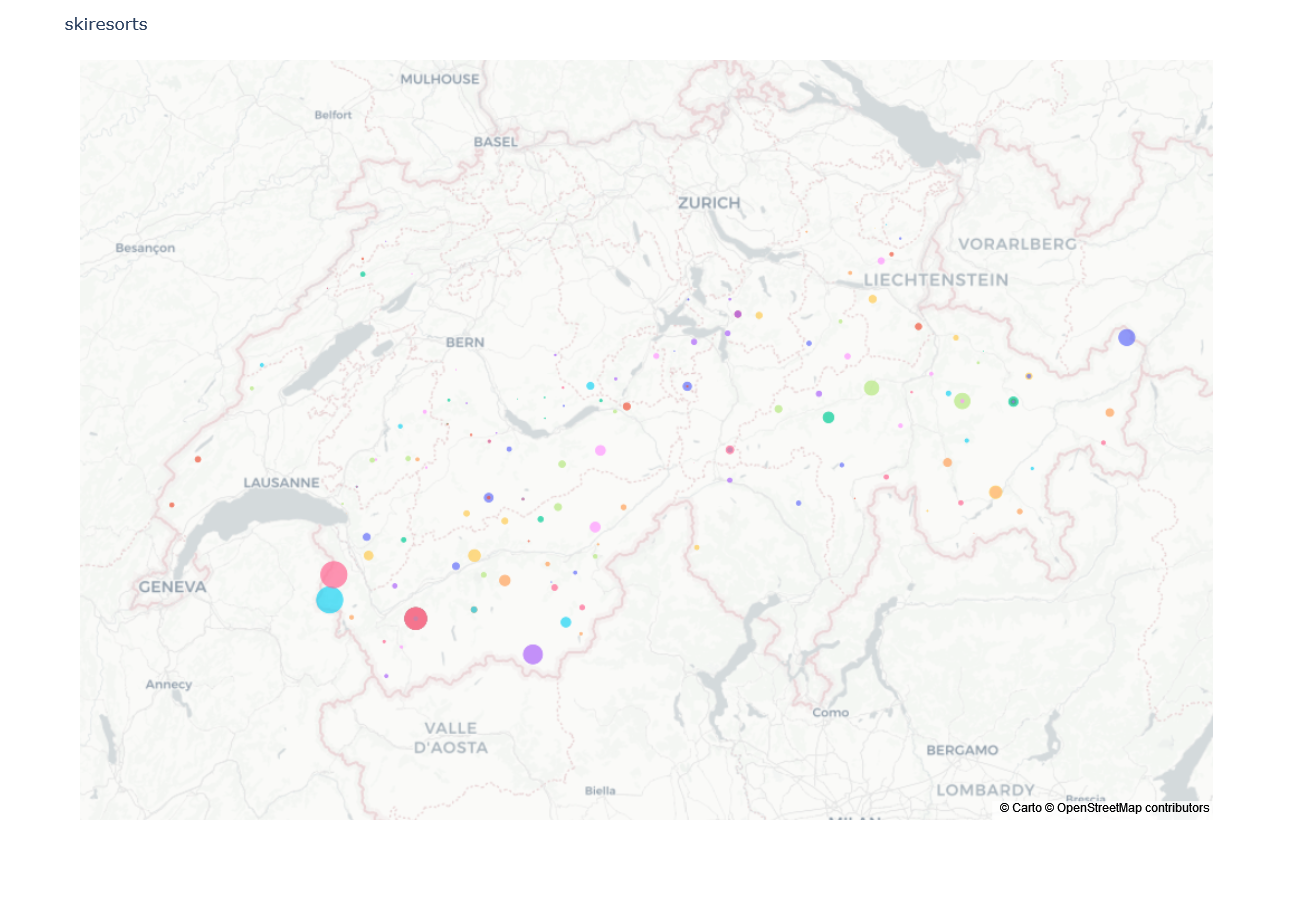

In [20]:
fig = px.scatter_mapbox(df, 
                        lon = df.Längengrad, 
                        lat = df.Breitengrad,
                       zoom = 7.3,
                       color = df.Skigebiet_Name,
                       size = df.Total_Pisten_Km,
                       )

fig.update_layout(mapbox_style = 'carto-positron',
                  width = 1800,
                  height = 900,
                  title = 'skiresorts',
                 showlegend = False)

fig.write_image("fig_scatter_mapbox.png")
fig.show()

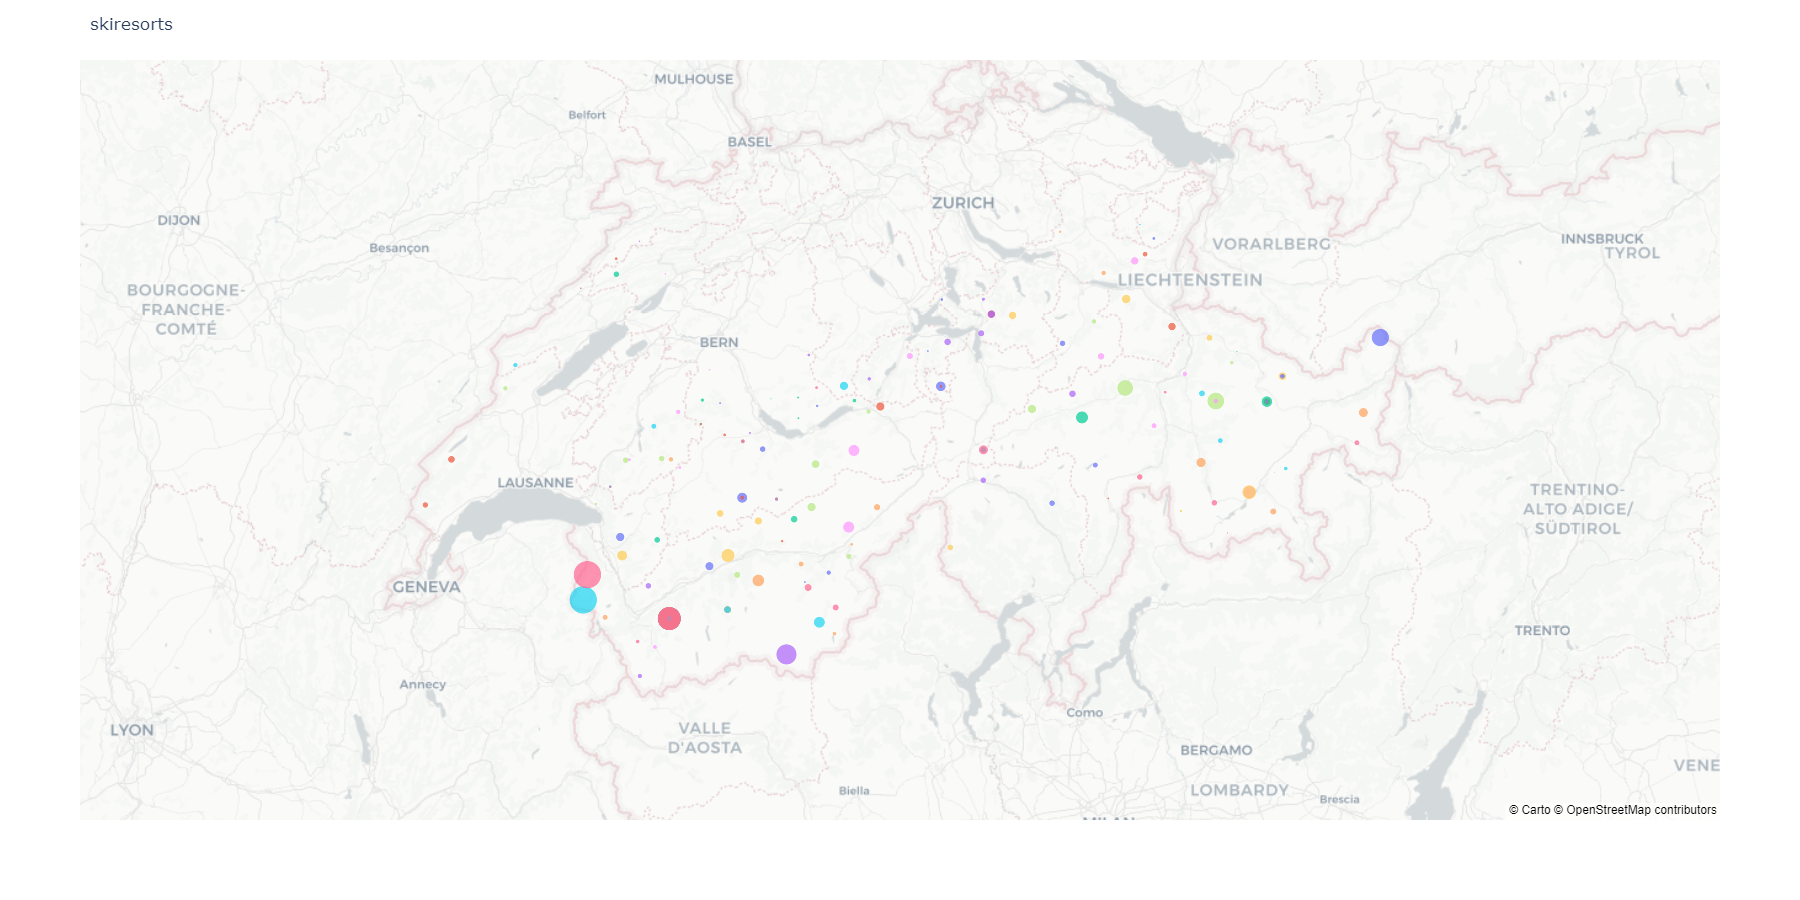

In [38]:
Image(filename='fig_scatter_mapbox.png') 

In [21]:
fig.write_html('Map_Switzerland_nice.html')